In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
heart=pd.read_csv('heart.csv')
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
print(heart.shape)

(918, 12)


In [ ]:
heart.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

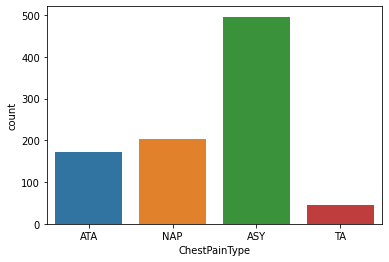

In [ ]:
sns.countplot(x='ChestPainType',data=heart)

In [ ]:
sex=pd.get_dummies(heart['Sex'],drop_first=True)
sex.head(5)

,M
0,1
1,0
2,1
3,0
4,1


In [ ]:
pain=pd.get_dummies(heart['ChestPainType'],drop_first=True)

In [ ]:
Ecg=pd.get_dummies(heart['RestingECG'],drop_first=True)

In [ ]:
angina=pd.get_dummies(heart['ExerciseAngina'],drop_first=True)

In [ ]:
slope=pd.get_dummies(heart['ST_Slope'],drop_first=True)

In [ ]:
heart=pd.concat([heart,sex,pain,Ecg,angina,slope],axis=1)
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0,1,0,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0,1,0,0,0,1


In [ ]:
heart.drop(['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)

In [ ]:
heart.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,1,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,0,1,0,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,1,1,0,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,1,0,0,0,1,0,1,1,0
9,48,120,284,0,120,0.0,0,0,1,0,0,1,0,0,0,1


In [ ]:
x=heart[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','M','ATA','NAP','TA','Normal','ST','Y','Flat','Up']]
y=heart['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions=logmodel.predict(xtest)
predictions

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.87      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

